In [22]:
import numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense, ZeroPadding2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import os

In [23]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [24]:
X_train, y_train = load_mnist('fashionmnist', kind='train')
X_test, y_test = load_mnist('fashionmnist', kind='t10k')
X_test.shape

(10000, 784)

In [25]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train.shape

(60000, 28, 28)

In [10]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [11]:
model = Sequential([
    ZeroPadding2D(padding=(1, 1), input_shape=(28, 28, 1), name= 'ZeroPadding1'),
    Conv2D(32, 3, activation='relu', name= 'Conv1'),
    Dropout(0.2, name= 'Dropout1'),
    MaxPool2D(pool_size=2, strides=2, name= 'MaxPool1'),
    ZeroPadding2D(padding=(1, 1), name= 'ZeroPadding2'),
    Conv2D(64, 3, activation='relu', name= 'Conv2'),
    Dropout(0.2, name= 'Dropout2'),
    MaxPool2D(pool_size=2, strides=2, name= 'MaxPool2'),
    Flatten(name= 'Flatten1'),
    Dense(128, activation='relu', name= 'Dense1'),
    Dropout(0.5, name= 'Dropout3'),
    Dense(10, activation='softmax', name= 'Dense2'),
])
model.summary()

c:\Users\almas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\zero_padding2d.py:72: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ zero_padding2d (ZeroPadding2D)  │ (None, 30, 30, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_1                │ (None, 16, 16, 32)     │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [14]:
history = model.fit(X_train, y_train_ohe, epochs=5, validation_data=(X_test, y_test_ohe), batch_size=300)

Epoch 1/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 23s 110ms/step - accuracy: 0.6424 - loss: 0.9832 - val_accuracy: 0.8459 - val_loss: 0.4499
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 20s 98ms/step - accuracy: 0.8388 - loss: 0.4515 - val_accuracy: 0.8724 - val_loss: 0.3705
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 19s 96ms/step - accuracy: 0.8650 - loss: 0.3820 - val_accuracy: 0.8838 - val_loss: 0.3384
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 20s 100ms/step - accuracy: 0.8795 - loss: 0.3427 - val_accuracy: 0.8918 - val_loss: 0.3128
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 21s 106ms/step - accuracy: 0.8860 - loss: 0.3172 - val_accuracy: 0.8937 - val_loss: 0.2984


<Axes: >

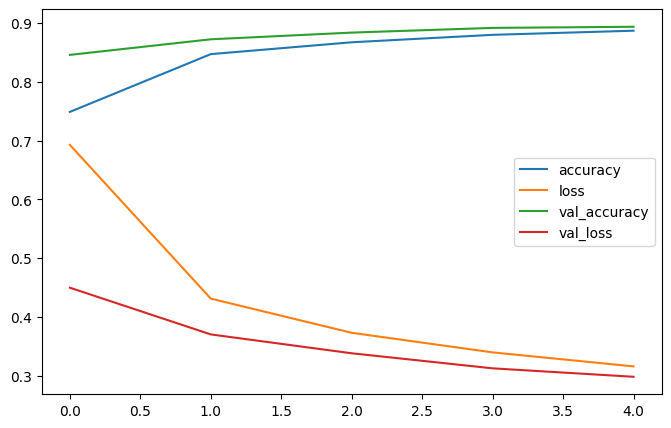

In [15]:
import pandas as pd
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
pd.DataFrame(history.history).plot(figsize=(8,5))

In [78]:
# Create a directory to save feature maps
output_dir = 'feature_maps'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Function to save feature maps
def save_feature_maps(layer_outputs, images, output_dir):
    for i, layer_output in enumerate(layer_outputs):
        for j in range(len(images)):
            feature_map = layer_output[j]
            if len(feature_map.shape) == 3:  # (height, width, channels)
                plt.figure(figsize=(10, 10))
                for k in range(feature_map.shape[-1]):
                    plt.subplot(8, 8, k + 1)
                    plt.imshow(feature_map[..., k], cmap='viridis')
                    plt.axis('off')
                plt.savefig(os.path.join(output_dir, f'layer_{i}_image_{j}.png'))
                plt.close()
            else:
                print(f"Skipping layer {i}, invalid shape for feature map.")
            

In [79]:
# Extract and save feature maps for the first image in the test set
test_images_sample = X_test[:1]

# Define a model that will return the outputs of each layer
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.inputs, outputs=layer_outputs)

# Get the feature maps
feature_maps = activation_model.predict(test_images_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [80]:
# Save the feature maps
save_feature_maps(feature_maps, test_images_sample, output_dir)

Skipping layer 8, invalid shape for feature map.
Skipping layer 9, invalid shape for feature map.
Skipping layer 10, invalid shape for feature map.
Skipping layer 11, invalid shape for feature map.


# <h1 dir='rtl' style= "margin-right: 20px ; color:#06b2ca"> تحلیل فیچرمپ‌ها </h1>

<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

* در ابتدای شبکه (لایه‌های اولیه)، فیچرمپ‌ها به ویژگی‌های عمومی‌تر و ساده‌تر مانند لبه‌ها و خطوط حساس هستند. این لایه‌ها اطلاعات پایه‌ای را استخراج می‌کنند که در مراحل بعدی توسط لایه‌های عمقی‌تر پردازش می‌شود.

* در انتهای شبکه (لایه‌های نهایی)، فیچرمپ‌ها به ویژگی‌های پیچیده‌تر و خاص‌تر از تصاویر واکنش نشان می‌دهند. این لایه‌ها ترکیبی از ویژگی‌های ساده‌تر را که در لایه‌های اولیه استخراج شده‌اند، به‌دست می‌آورند تا به تشخیص دقیق‌تر و کامل‌تری برسند.

## نتایج:


1. **لایه Conv1:** فیچرمپ‌ها در این لایه به خطوط و لبه‌های ساده حساس هستند.
2. **لایه Conv2:** فیچرمپ‌ها در این لایه شروع به تشخیص الگوهای پیچیده‌تر می‌کنند.
3. **لایه Dense2:** در لایه‌های نهایی، شبکه قادر به تشخیص ویژگی‌های پیچیده و خاص‌تری از تصویر است.

</div>